In [1]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("Jisdoredit1.csv", parse_dates = True, index_col = 0)
train = df['Rate'][:505].to_numpy()
test = df['Rate'][505:].to_numpy()
sc = MinMaxScaler(feature_range=(0,1))
train = sc.fit_transform(train.reshape(-1,1))
test = sc.transform(test.reshape(-1,1))

def data_preparation(data):
    x = []
    y = []
    
    for i in range(10, len(data)):
        x.append(data[i-10:i, 0])
        y.append(data[i])
    x, y = np.array(x), np.array(y)
    
    x = np.reshape(x, (x.shape[0], x.shape[1], 1))
    return x, y

x_train, y_train = data_preparation(train)
x_test, y_test = data_preparation(test)

model = Sequential()
model.add(LSTM(units=5, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=5))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer = 'adam', loss ='mean_squared_error', metrics=['accuracy'])
model.fit(x_train, y_train, epochs = 50, batch_size = 4)

Epoch 1/50
124/124 [==============================] - 10s 20ms/step - loss: 0.0191 - accuracy: 0.0020
Epoch 2/50
124/124 [==============================] - 2s 19ms/step - loss: 0.0106 - accuracy: 0.0040
Epoch 3/50
124/124 [==============================] - 2s 19ms/step - loss: 0.0097 - accuracy: 0.0040
Epoch 4/50
124/124 [==============================] - 2s 19ms/step - loss: 0.0090 - accuracy: 0.0040
Epoch 5/50
124/124 [==============================] - 2s 19ms/step - loss: 0.0085 - accuracy: 0.0040
Epoch 6/50
124/124 [==============================] - 2s 19ms/step - loss: 0.0072 - accuracy: 0.0040
Epoch 7/50
124/124 [==============================] - 2s 19ms/step - loss: 0.0077 - accuracy: 0.0040
Epoch 8/50
124/124 [==============================] - 2s 19ms/step - loss: 0.0071 - accuracy: 0.0020
Epoch 9/50
124/124 [==============================] - 2s 19ms/step - loss: 0.0068 - accuracy: 0.0040
Epoch 10/50
124/124 [==============================] - 2s 20ms/step - loss: 0.0064 - accur

1/1 [==============================] - 2s 2s/step


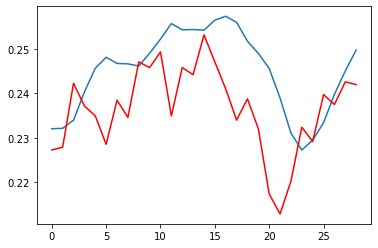

In [2]:
y_pred = model.predict(x_test)
fig, ax = plt.subplots()
ax.plot(y_pred)
ax.plot(y_test, c = 'r')

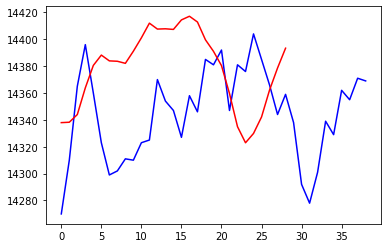

In [3]:
y_pred = sc.inverse_transform(y_pred)
ig, ax = plt.subplots()
y_real = df['Rate'].to_numpy()
ax.plot(y_real[505:], color ='b', label = 'Real Rate')
ax.plot(y_pred, color ='r', label = 'Forcaste Rate')